<a href="https://colab.research.google.com/github/Sagargomad/My_projects/blob/main/classification_of_titanium_alloys_based_on_solid_solubility.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Program for classifying alloying system as soluble, partially soluble and insoluble
-More than 5 algorithms

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pandas is used for data manipulation
import pandas as pd
# Read in data and display first 5 rows
features = pd.read_excel('/content/drive/MyDrive/Mtech project/Nickel dataset updated.xlsx')
features.head()

,element,atomic radius,electronegativity of solute,Valence,Crystal\nstructure factor,a,b,c,A,B,...,Valence factor,Crystal structure\nfactor,atomic weight factor,heat of mixing,Cohesive energy,Density,Melting point,Density factor,Melting point factor,Cohesive energy factor
0,H,1.10,2.20,1,HCP,90.000,90.000,120.000,470.00,470.00,...,2.000000,HCP,0.982826,-23.0,4.38,0.000082,13.99,0.999991,0.991904,0.013514
1,Be,1.53,1.57,2,HCP,90.000,90.000,120.000,228.58,228.58,...,1.000000,HCP,0.846453,-4.0,3.32,1.850000,1560.00,0.792135,0.097222,0.252252
2,B,1.92,2.04,3,OTHER,58.053,58.053,58.053,506.00,506.00,...,0.666667,OTHER,0.815823,-24.0,5.81,2.340000,2350.00,0.737079,-0.359954,-0.308559
3,C,1.70,2.55,4,HCP,90.000,90.000,120.000,246.40,246.40,...,0.500000,HCP,0.795360,-39.0,7.37,2.200000,4098.00,0.752809,-1.371528,-0.659910
4,N,1.55,3.04,3,HCP,90.000,90.000,120.000,386.10,386.10,...,0.666667,HCP,0.761353,-69.0,4.92,0.001145,63.20,0.999871,0.963426,-0.108108


In [ ]:
features.columns


Index(['element', 'atomic radius', 'electronegativity of solute', 'Valence',
       'Crystal\nstructure factor', 'a', 'b', 'c', 'A', 'B', 'C',
       'atomic weight', 'solubility', 'atomic ra\ndius Ni',
       'electronegat\nivity of Ni', 'valence of solvent ',
       'atomic\nweight of Ni', 'atomic size factor',
       'electronegativity factor', 'Valence factor',
       'Crystal structure\nfactor', 'atomic weight factor', 'heat of mixing',
       'Cohesive energy', 'Density', 'Melting point', 'Density factor',
       'Melting point factor', 'Cohesive energy factor'],
      dtype='object')

In [ ]:
features=features[:59]

In [ ]:
features=features.dropna()
feature=features.reset_index(drop=True)

In [ ]:
features.shape

(59, 29)

In [ ]:
import numpy as np

In [ ]:
# Create dummy variables for the catgeorical variable crystal structure
features['BCC'] = np.where(features['Crystal\nstructure factor']=='BCC', 1, 0)
features['FCC'] = np.where(features['Crystal\nstructure factor']=='FCC', 1, 0)
features['HCP'] = np.where(features['Crystal\nstructure factor']=='HCP', 1, 0)
#dataset['ORTHOROMBIC'] = np.where(dataset['Crystal structure']=='ORTHOROMBIC', 1, 0)
#dataset['MONOCLINIC'] = np.where(dataset['Crystal structure']=='MONOCLINIC', 1, 0)
features['OTHER'] = np.where(features['Crystal\nstructure factor']=='OTHER', 1, 0)
features.rename(columns={'solubility':'actual'}, inplace=True)

In [ ]:
features['class'] = features['actual'].apply(lambda x : 0 if x <=0.1 else 1 if 0.1<x<5  else 2) #classifying according to solid solubility: sulubility=actual

In [ ]:
X=features[[ 'atomic size factor',
       'electronegativity factor', 'Valence factor',
        'heat of mixing',
       'BCC','FCC','HCP','OTHER',
      ]].copy() #These all are independent factors'BCC','FCC','HCP','OTHER',

In [ ]:
X.rename(columns={'atomic size factor':'AS','Valency factor':'VF','electronegativity factor':'EL','heat of mixing':'HM'}, inplace=True)#,'Density factor':'DF','Melting point factor':'MP','atomic weight factor':'AW'

In [ ]:
Y=features['class']
y=features['class']


In [ ]:
from sklearn.preprocessing import StandardScaler #scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6666666666666666

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test, y_test)


0.8333333333333334

In [ ]:
pca.explained_variance_ratio_

array([0.63613364, 0.16960166, 0.1068227 , 0.03329093, 0.0257123 ])

In [ ]:
pca.n_components_

5

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6153846153846154

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6923076923076923

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(64, 2)

In [ ]:
pca.explained_variance_ratio_

array([0.63613364, 0.16960166])

In [ ]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, Y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6923076923076923

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#corr.style.background_gradient(cmap='coolwarm')

<ipython-input-15-af55acf09e0e>:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,atomic size factor,electronegativity factor,Valence factor,atomic weight factor,heat of mixing,Density factor,BCC,FCC,HCP,OTHER,Melting point factor,Cohesive energy factor
atomic size factor,1.00,-0.58,0.27,0.58,-0.03,0.27,-0.21,-0.01,0.05,0.14,0.18,-0.06
electronegativity factor,-0.58,1.00,0.15,-0.23,-0.07,0.23,0.20,-0.08,0.08,-0.20,0.13,0.39
Valence factor,0.27,0.15,1.00,0.26,0.11,0.39,-0.18,0.08,0.11,-0.07,0.49,0.49
atomic weight factor,0.58,-0.23,0.26,1.00,-0.33,0.76,-0.08,-0.02,-0.01,0.11,0.15,0.06
heat of mixing,-0.03,-0.07,0.11,-0.33,1.00,-0.42,0.04,0.44,-0.39,-0.04,0.10,0.24
Density factor,0.27,0.23,0.39,0.76,-0.42,1.00,-0.09,-0.20,0.10,0.19,0.49,0.46
BCC,-0.21,0.20,-0.18,-0.08,0.04,-0.09,1.00,-0.24,-0.34,-0.18,-0.34,-0.28
FCC,-0.01,-0.08,0.08,-0.02,0.44,-0.20,-0.24,1.00,-0.52,-0.28,0.07,0.15
HCP,0.05,0.08,0.11,-0.01,-0.39,0.10,-0.34,-0.52,1.00,-0.39,-0.08,-0.12
OTHER,0.14,-0.20,-0.07,0.11,-0.04,0.19,-0.18,-0.28,-0.39,1.00,0.34,0.24


In [ ]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(10,6))
    heatmap = sns.heatmap(df.corr(), vmin=-1,
                      vmax=1, annot=True)
    plt.title("spearman Correlation")
    return(r)

In [ ]:
display_correlation(X)

NameError: ignored

<Figure size 1000x600 with 0 Axes>

In [ ]:
import numpy as np
from scipy.stats import kendalltau

# Example dataset
#data = np.array([[1, 2, 3], [2, 3, 1], [3, 1, 2]])

# Compute Kendall's Tau Correlation Coefficient matrix
n = X.shape[1]
kendall_tau_matrix = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        corr, pvalue = kendalltau(X,X)
        kendall_tau_matrix[i, j] = corr

print(kendall_tau_matrix)

[[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

<Axes: >

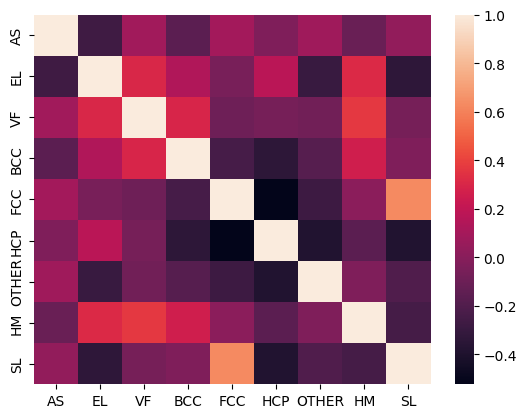

In [ ]:
import seaborn as sns
corr = X.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

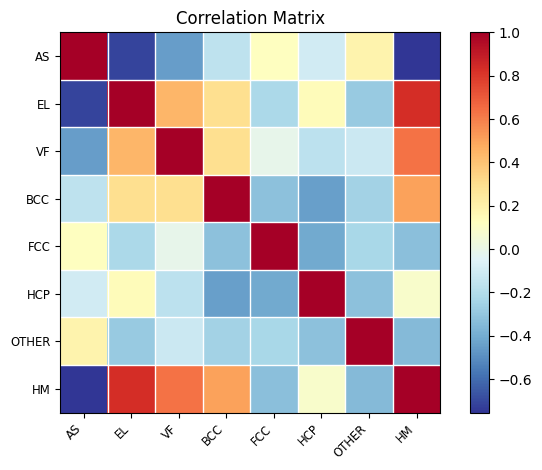

In [ ]:
corr = X.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59 entries, 1 to 59
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   element                      59 non-null     object 
 1   atomic radius                59 non-null     float64
 2   electronegativity of solute  59 non-null     float64
 3   Valence                      59 non-null     float64
 4   Crystal
structure            59 non-null     object 
 5   a                            59 non-null     float64
 6   b                            59 non-null     float64
 7   c                            59 non-null     float64
 8   A                            59 non-null     float64
 9   B                            59 non-null     float64
 10  C                            59 non-null     float64
 11  atomic weight                59 non-null     float64
 12  solubility                   59 non-null     float64
 13  atomic ra
dius Ni     

In [ ]:
X =features[[ 'atomic size factor',
       'electronegativity factor','Valence factor','BCC','FCC','HCP','OTHER', 'heat of mixing']].copy()
y = features['class'].copy()

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   atomic size factor        59 non-null     float64
 1   electronegativity factor  59 non-null     float64
 2   Valence factor            59 non-null     float64
 3   atomic weight factor      59 non-null     float64
 4   heat of mixing            59 non-null     float64
 5   Density factor            59 non-null     float64
 6   BCC                       59 non-null     int64  
 7   FCC                       59 non-null     int64  
 8   HCP                       59 non-null     int64  
 9   OTHER                     59 non-null     int64  
 10  Melting point factor      59 non-null     float64
dtypes: float64(7), int64(4)
memory usage: 5.2 KB


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

# Load the imbalanced dataset
#data = pd.read_csv('path/to/dataset.csv')  # Replace with the path to your dataset
#X = data.drop('target_variable', axis=1)  # Replace 'target_variable' with the name of your target variable
#y = data['target_variable']

# Count the class distribution
class_counts = y.value_counts()
print('Class Distribution (Before balancing):\n', class_counts)

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Count the class distribution after balancing
balanced_class_counts = np.bincount(y_balanced)
print('Class Distribution (After balancing):\n', balanced_class_counts)


Class Distribution (Before balancing):
 2    30
0    20
1     9
Name: class, dtype: int64
Class Distribution (After balancing):
 [30 30 30]


In [ ]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size = 0.25, random_state = 0)

In [ ]:
>>> import numpy as np
>>> from sklearn.model_selection import train_test_split
>>> from sklearn import datasets
>>> from sklearn import svm

In [ ]:
>>> clf = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
>>> clf.score(X_test, y_test)

0.7391304347826086

In [ ]:
train_preds=clf.predict(X_train)
test_preds=clf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

In [ ]:
accuracy_score(y_train,train_preds)

0.6417910447761194

In [ ]:
accuracy_score(y_test,test_preds)

0.7391304347826086

In [ ]:
>>> from sklearn.metrics import f1_score

In [ ]:
>>> f1_score(y_train,train_preds, average=None)


array([0.58536585, 0.68292683, 0.65384615])

In [ ]:
>>> f1_score(y_test,test_preds, average=None)

array([0.77777778, 0.72727273, 0.70588235])

In [ ]:
>>> from sklearn.model_selection import cross_val_score
>>> clf = svm.SVC(kernel='linear', C=1, random_state=0)
>>> scores = cross_val_score(clf, X_test, y_test, cv=5)
>>> scores

array([0.6 , 0.6 , 0.6 , 0.25, 0.5 ])

In [ ]:
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.51 accuracy with a standard deviation of 0.14


In [ ]:
>>> from sklearn import metrics
>>> scores = cross_val_score(
...     clf, X, y, cv=5, scoring='f1_micro')
>>> scores

array([0.41666667, 0.66666667, 0.75      , 0.83333333, 0.81818182])

In [ ]:
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.70 accuracy with a standard deviation of 0.15


In [ ]:
>>> from sklearn.model_selection import ShuffleSplit
>>> n_samples = X.shape[0]
>>> cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
>>> scores=cross_val_score(clf, X, y, cv=cv)


In [ ]:
scores.mean()

0.7

In [ ]:
>>> def custom_cv_2folds(X):
...     n = X.shape[0]
...     i = 1
...     while i <= 2:
...         idx = np.arange(n * (i - 1) / 2, n * i / 2, dtype=int)
...         yield idx, idx
...         i += 1
...
>>> custom_cv = custom_cv_2folds(X)
>>> cross_val_score(clf, X, y, cv=custom_cv)

array([0.7       , 0.86666667])

In [ ]:
>>> from sklearn import preprocessing
>>> X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.2, random_state=0)
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> X_train_transformed = scaler.transform(X_train)
>>> clf = svm.SVC(C=1, scaler.transform(X_test))
>>> clf.score(X_test_transformed, y_test)

SyntaxError: ignored

In [ ]:
>>> from sklearn.pipeline import make_pipeline
>>> clf = make_pipeline(preprocessing.StandardScaler(), svm.SVC(C=1))
>>> scores=cross_val_score(clf, X, y, cv=cv)
scores

NameError: ignored

In [ ]:
>>> print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.71 accuracy with a standard deviation of 0.11


In [ ]:
>>> from sklearn.model_selection import cross_validate
>>> from sklearn.metrics import recall_score
>>> scoring = ['precision_micro', 'recall_micro']
>>> clf = svm.SVC(kernel='linear', C=1, random_state=0)
>>> scores = cross_validate(clf, X, y, scoring=scoring)
>>> sorted(scores.keys())
['fit_time', 'score_time', 'test_precision_micro', 'test_recall_micro']
>>> scores['test_recall_micro']

array([0.41666667, 0.66666667, 0.75      , 0.83333333, 0.81818182])

In [ ]:
>>> from sklearn.metrics import make_scorer
>>> scoring = {'prec_micro': 'precision_micro',
...            'rec_macro': make_scorer(recall_score, average='micro')}
>>> scores = cross_validate(clf, X, y, scoring=scoring,
...                         cv=5, return_train_score=True)
>>> sorted(scores.keys())
['fit_time', 'score_time', 'test_prec_micro', 'test_rec_micro',
 'train_prec_macro', 'train_rec_macro']
>>> scores['train_rec_macro']

array([0.80851064, 0.78723404, 0.70212766, 0.76595745, 0.72916667])

In [ ]:
>>> scores = cross_validate(clf, X, y,
...                         scoring='precision_micro', cv=5,
...                         return_estimator=True)
>>> sorted(scores.keys())
['estimator', 'fit_time', 'score_time', 'test_score']

['estimator', 'fit_time', 'score_time', 'test_score']

In [ ]:
scores

{'fit_time': array([0.00789928, 0.00533795, 0.00545597, 0.00347281, 0.0039432 ]),
 'score_time': array([0.005867  , 0.00281286, 0.00224686, 0.002177  , 0.00214863]),
 'estimator': [SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0),
  SVC(C=1, kernel='linear', random_state=0)],
 'test_score': array([0.41666667, 0.66666667, 0.75      , 0.83333333, 0.81818182])}

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generate a random multi-class classification dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5,
  #                         n_classes=3, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing set
svm_preds = svm_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_preds)

# Print the accuracy
print('Accuracy:', accuracy)


Accuracy: 0.5833333333333334


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Model training
clf = RandomForestClassifier(n_estimators = 50, max_depth = 2, max_features = 3, bootstrap = False, random_state = 0).fit(X_train, y_train)

In [ ]:
train_preds =  clf.predict(X_train)
test_preds  = clf.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)

0.8297872340425532

In [ ]:
accuracy_score(y_test,test_preds)

0.5833333333333334

In [ ]:
grid = {
    'n_estimators': [10,20,30,40,50,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [0]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

In [ ]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'n_estimators': 30,
 'random_state': 0}

In [ ]:
rf2 = RandomForestClassifier(n_estimators = 30, max_depth = 3, max_features = 'sqrt',random_state = 0, criterion = 'gini').fit(X_train, y_train)


In [ ]:
train_preds =  rf2.predict(X_train)
test_preds  = rf2.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)

0.8723404255319149

In [ ]:
accuracy_score(y_test,test_preds)

0.6666666666666666

In [ ]:
>>> f1_score(y_train,train_preds, average=None)

array([0.83870968, 0.8       , 0.90566038])

In [ ]:
>>> f1_score(y_test,test_preds, average=None)

array([0.8 , 0.  , 0.75])

In [ ]:
>>> from sklearn.model_selection import cross_val_score
>>> scores = cross_val_score(rf2, X, y, cv=5)
>>> scores

array([0.5       , 0.83333333, 0.83333333, 0.83333333, 0.81818182])

In [ ]:
scores.mean()

0.7636363636363638

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
import seaborn as sns

[[19  0  1]
 [ 0 25  0]
 [ 0  1 21]]


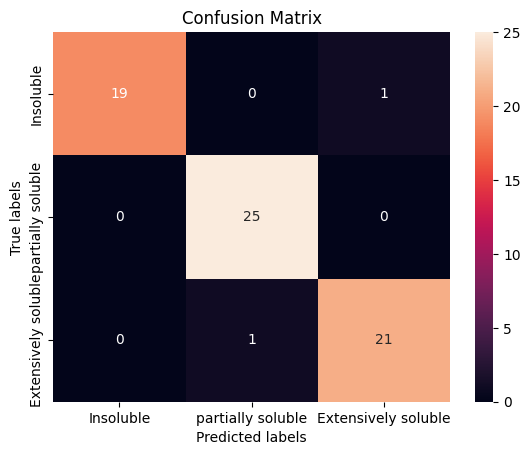

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Insoluble', 'partially soluble','Extensively soluble']
cm = confusion_matrix(y_train,train_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
from pylab import rcParams
rcParams['figure.figsize'] = 12,6

[[6 1 3]
 [0 5 0]
 [0 0 8]]


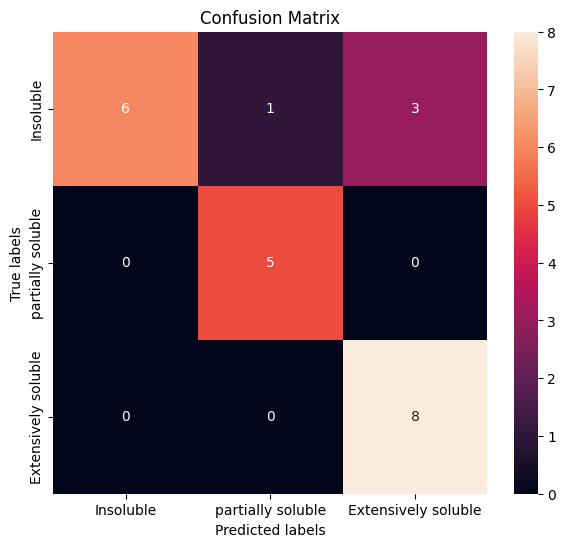

In [ ]:
# Get the confusion matrix for both train and test

labels =  ['Insoluble', 'partially soluble','Extensively soluble']
cm = confusion_matrix(y_test,test_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)
from pylab import rcParams
rcParams['figure.figsize'] = 7, 6

In [ ]:
>>> from sklearn import tree
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X_train, y_train)

In [ ]:
>>> test_preds=clf.predict(X_test)

In [ ]:
train_preds=clf.predict(X_train)

In [ ]:
accuracy_score(y_train,train_preds)

1.0

In [ ]:
accuracy_score(y_test,test_preds)

0.782608695652174

In [ ]:
>>> f1_score(y_train,train_preds, average=None)

array([1., 1., 1.])

In [ ]:
>>> f1_score(y_test,test_preds, average=None)

array([0.75      , 0.83333333, 0.77777778])

In [ ]:

>>> from sklearn import tree
>>> clf = tree.DecisionTreeClassifier()
>>> clf = clf.fit(X_train, y_train)

[Text(0.34782608695652173, 0.95, 'x[0] <= -0.14\ngini = 0.664\nsamples = 67\nvalue = [20, 25, 22]'),
 Text(0.17391304347826086, 0.85, 'x[1] <= 1.501\ngini = 0.105\nsamples = 18\nvalue = [17, 1, 0]'),
 Text(0.08695652173913043, 0.75, 'gini = 0.0\nsamples = 15\nvalue = [15, 0, 0]'),
 Text(0.2608695652173913, 0.75, 'x[4] <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1, 0]'),
 Text(0.17391304347826086, 0.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.34782608695652173, 0.65, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5217391304347826, 0.85, 'x[2] <= 0.45\ngini = 0.555\nsamples = 49\nvalue = [3, 24, 22]'),
 Text(0.43478260869565216, 0.75, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 13]'),
 Text(0.6086956521739131, 0.75, 'x[2] <= 1.027\ngini = 0.486\nsamples = 36\nvalue = [3, 24, 9]'),
 Text(0.5217391304347826, 0.65, 'x[7] <= 4.678\ngini = 0.594\nsamples = 24\nvalue = [3, 12, 9]'),
 Text(0.43478260869565216, 0.55, 'x[7] <= -37.0\ngini = 0.615\nsamples = 19\nvalue = [3,

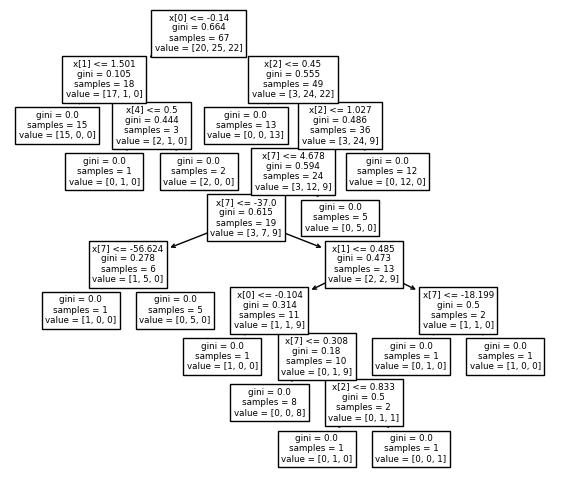

In [ ]:
tree.plot_tree(clf)


In [ ]:
from sklearn.tree import plot_tree

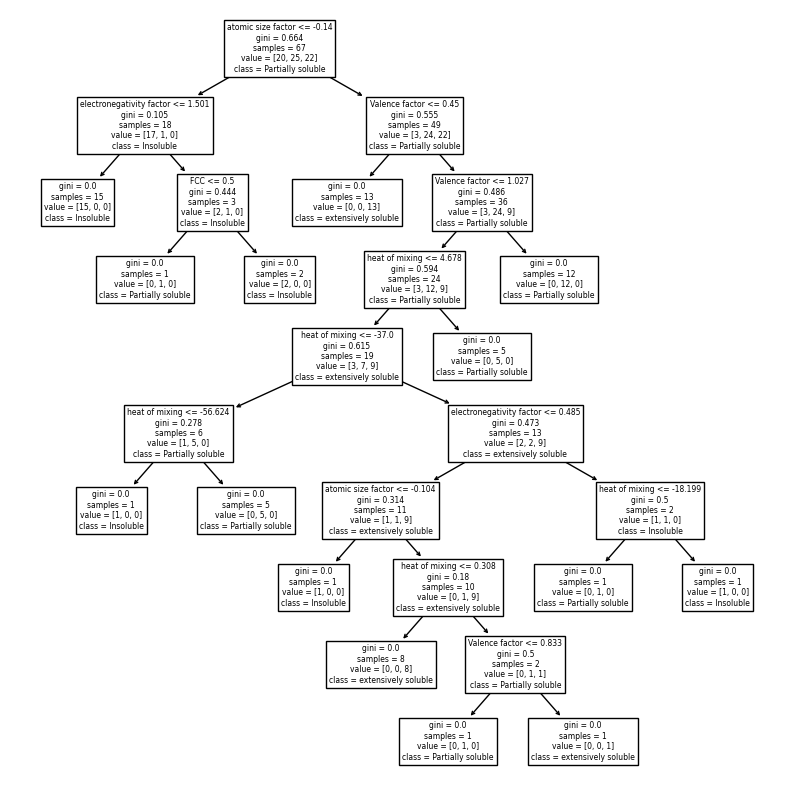

In [ ]:
#classifier = DecisionTreeClassifier()



_, ax = plt.subplots(figsize=(10,10)) # Resize figure
plot_tree(clf, feature_names = X.columns,
               class_names=['Insoluble','Partially soluble','extensively soluble',], filled=False, ax=ax)
plt.show()

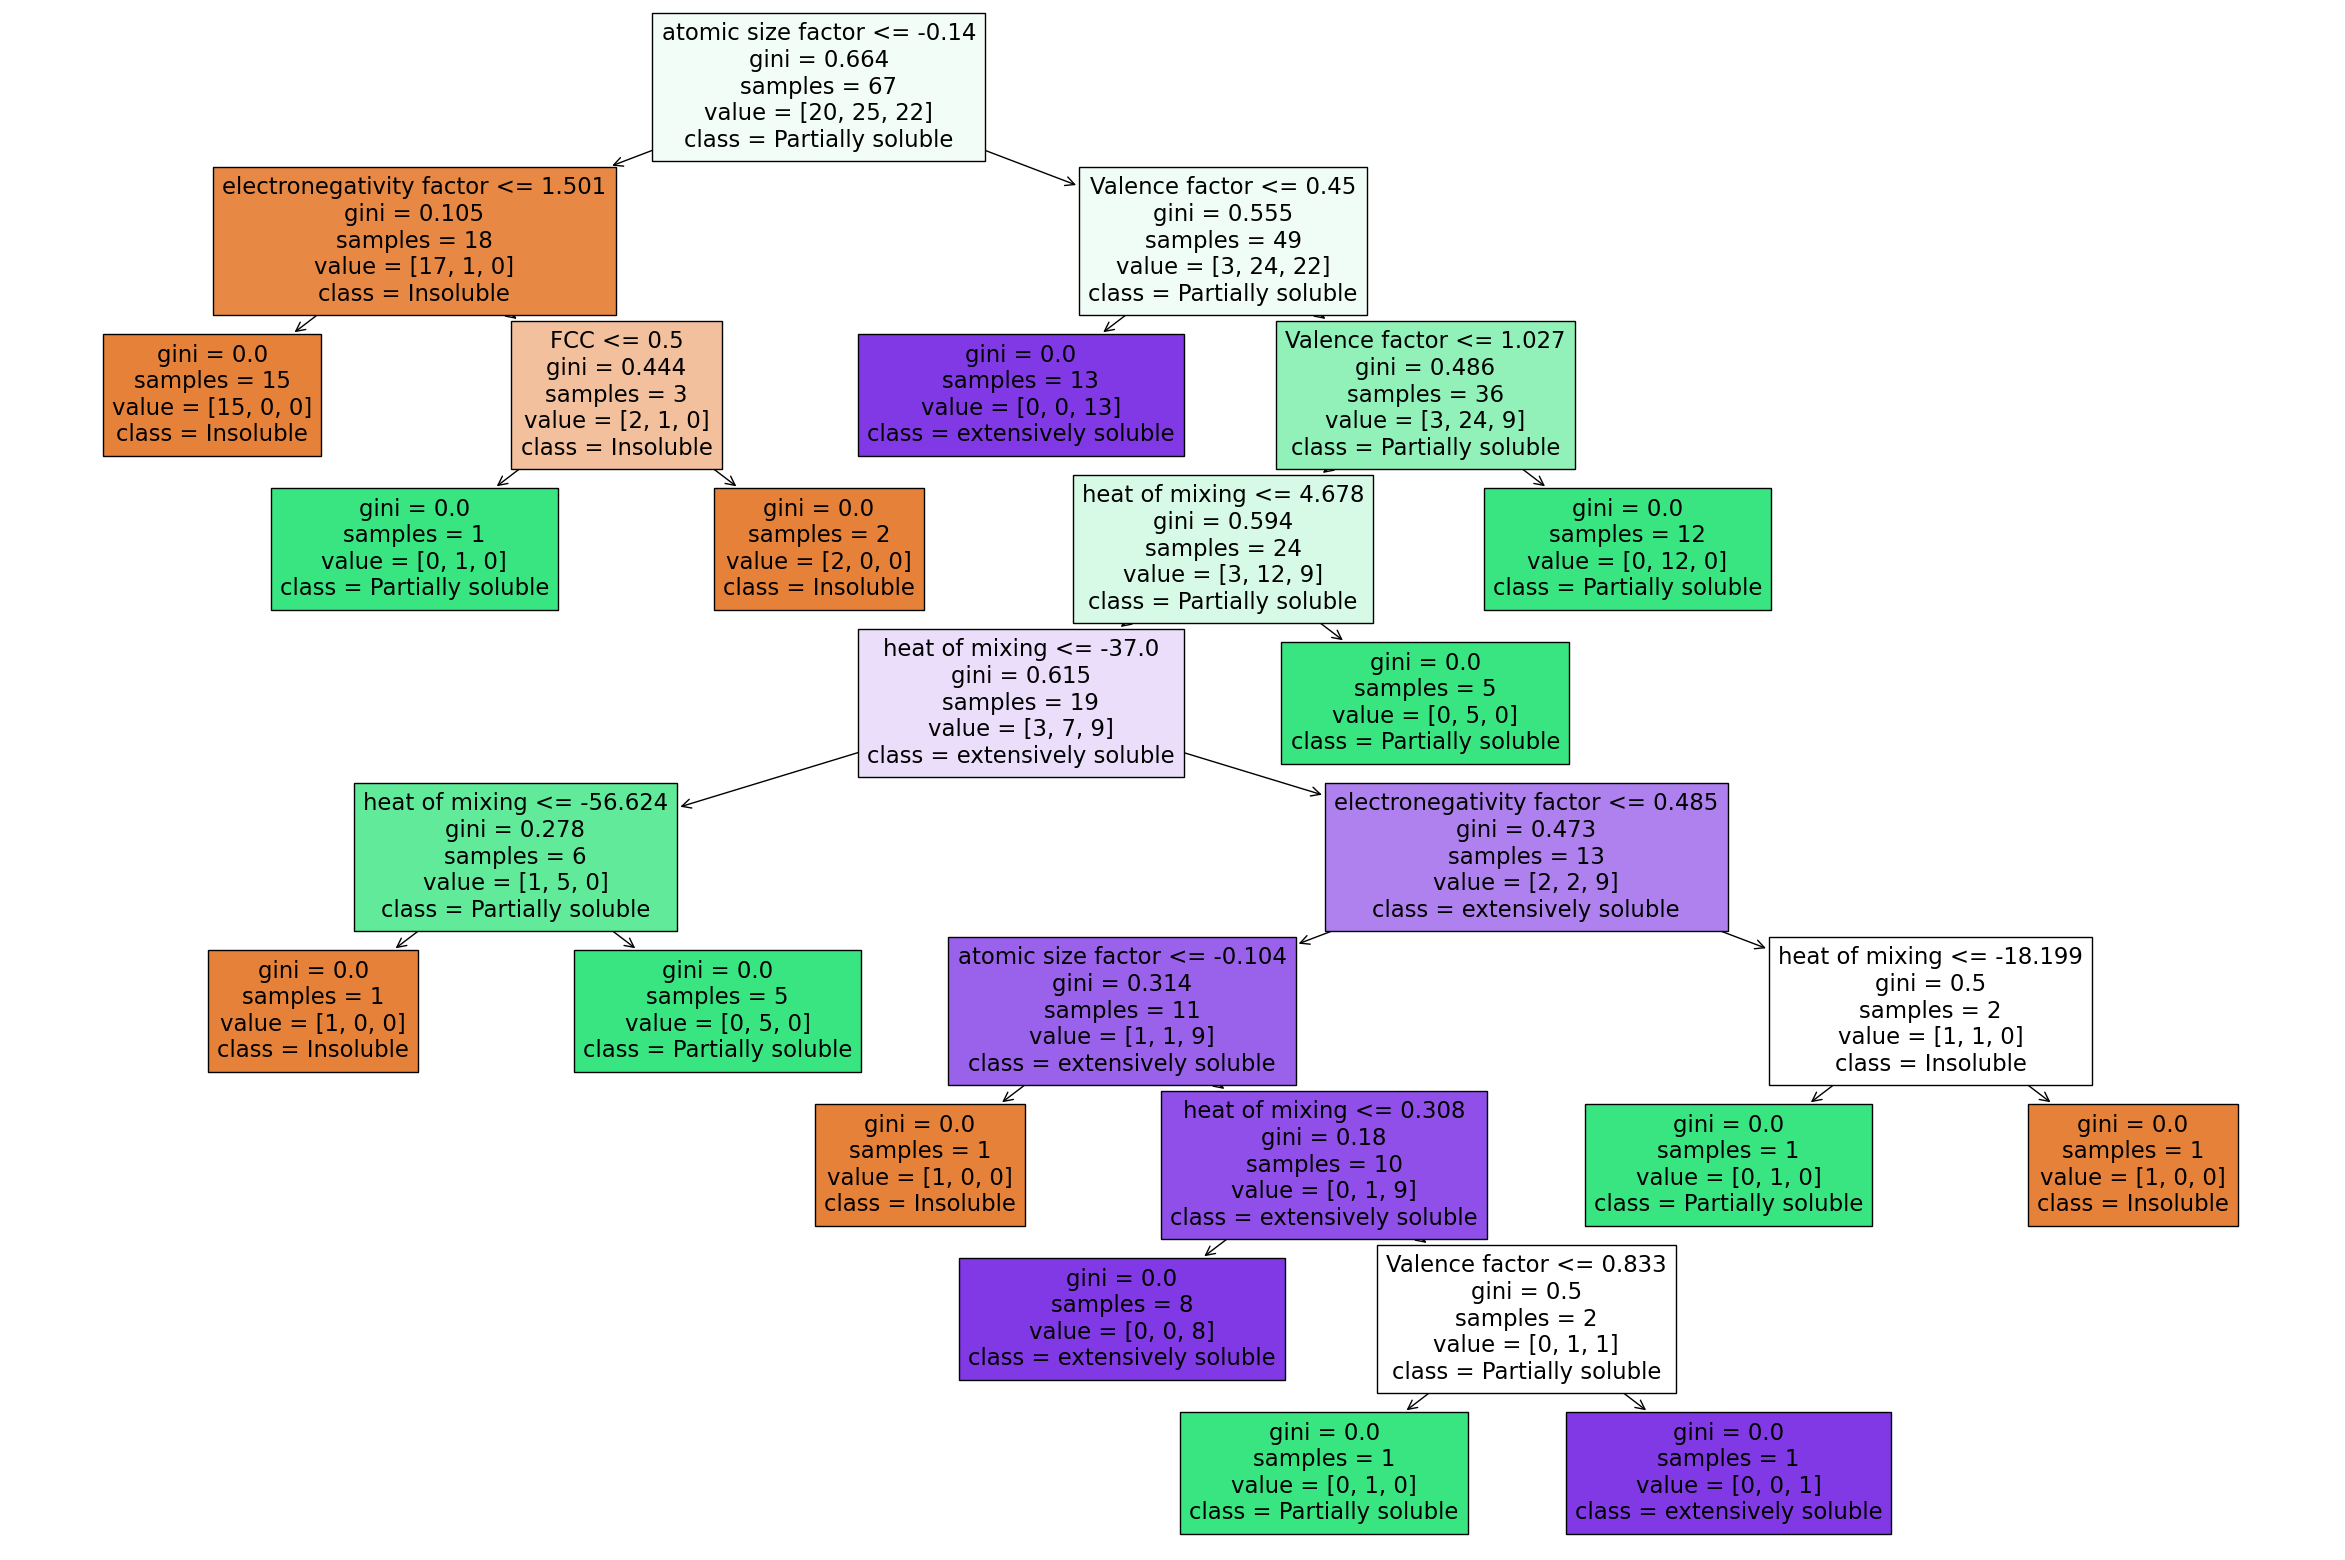

In [ ]:
#classifier = DecisionTreeClassifier()



_, ax = plt.subplots(figsize=(30,20)) # Resize figure
plot_tree(clf, feature_names = X.columns,
               class_names=['Insoluble','Partially soluble','extensively soluble'], filled=True, ax=ax)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create the parameter grid based on the results of random search
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [ ]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits
CPU times: user 173 ms, sys: 49.2 ms, total: 222 ms
Wall time: 2.16 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5],
                         'min_samples_leaf': [5, 10]},
             scoring='accuracy', verbose=1)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [ ]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004492,0.001845,0.002058,0.000307,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.636364,0.545455,0.818182,0.454545,0.613636,0.134456,9
1,0.004863,0.003096,0.002583,0.000823,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.636364,0.454545,0.818182,0.363636,0.568182,0.174571,10
2,0.003299,0.000347,0.004490,0.004069,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.545455,0.545455,0.454545,0.454545,0.500000,0.045455,16
3,0.003110,0.000116,0.002849,0.001103,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.545455,0.545455,0.454545,0.454545,0.500000,0.045455,16
4,0.003294,0.000506,0.002044,0.000049,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.545455,0.545455,0.454545,0.454545,0.500000,0.045455,16


In [ ]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
30,0.002866,0.000276,0.002020,0.000112,entropy,3,5,"{'criterion': 'entropy', 'max_depth': 3, 'min_...",0.636364,0.727273,0.727273,0.727273,0.704545,0.039365,1
35,0.002778,0.000106,0.002013,0.000026,entropy,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.636364,0.727273,0.727273,0.727273,0.704545,0.039365,1
40,0.002910,0.000283,0.002347,0.000772,entropy,10,5,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.636364,0.727273,0.727273,0.727273,0.704545,0.039365,1
45,0.002693,0.000139,0.002232,0.000555,entropy,20,5,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.636364,0.727273,0.727273,0.727273,0.704545,0.039365,1
5,0.005370,0.003097,0.002623,0.000614,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.636364,0.545455,0.636364,0.727273,0.636364,0.064282,5


In [ ]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=42)

In [ ]:
dt_best = grid_search.best_estimator_

In [ ]:
def evaluate_model(dt_classifier):
    print("Train Accuracy :", accuracy_score(y_train, dt_classifier.predict(X_train)))
    print("Train Confusion Matrix:")
    print(confusion_matrix(y_train, dt_classifier.predict(X_train)))
    print("-"*50)
    print("Test Accuracy :", accuracy_score(y_test, dt_classifier.predict(X_test)))
    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test, dt_classifier.predict(X_test)))

In [ ]:
evaluate_model(dt_best)

Train Accuracy : 0.8409090909090909
Train Confusion Matrix:
[[13  0  0]
 [ 5 17  0]
 [ 0  2  7]]
--------------------------------------------------
Test Accuracy : 0.8
Test Confusion Matrix:
[[6 1 0]
 [2 5 0]
 [0 0 1]]


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.83      0.71      0.77         7
           2       1.00      1.00      1.00         1

    accuracy                           0.80        15
   macro avg       0.86      0.86      0.86        15
weighted avg       0.81      0.80      0.80        15



In [ ]:
def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(15,15))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=['Insoluble', "partially soluble","extensively soluble"],
                       filled=True)

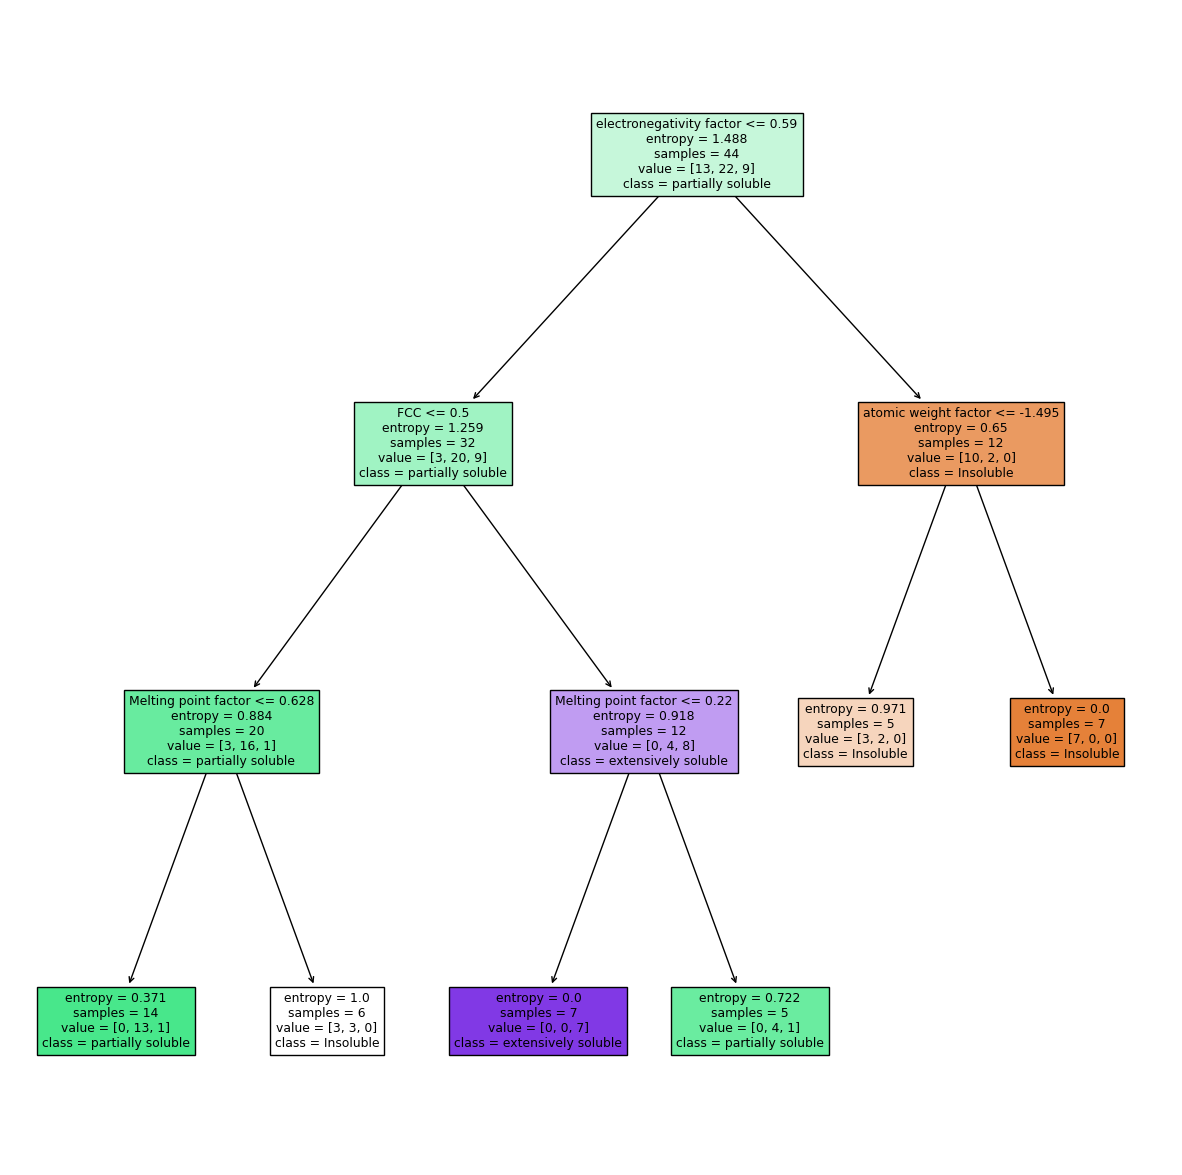

In [ ]:

get_dt_graph(dt_best)

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.013 seconds


In [ ]:
X.columns

Index(['atomic size factor', 'electronegativity factor', 'Valence factor',
       'BCC', 'FCC', 'HCP', 'OTHER', 'atomic weight factor', 'heat of mixing',
       'Density factor', 'Melting point factor'],
      dtype='object')

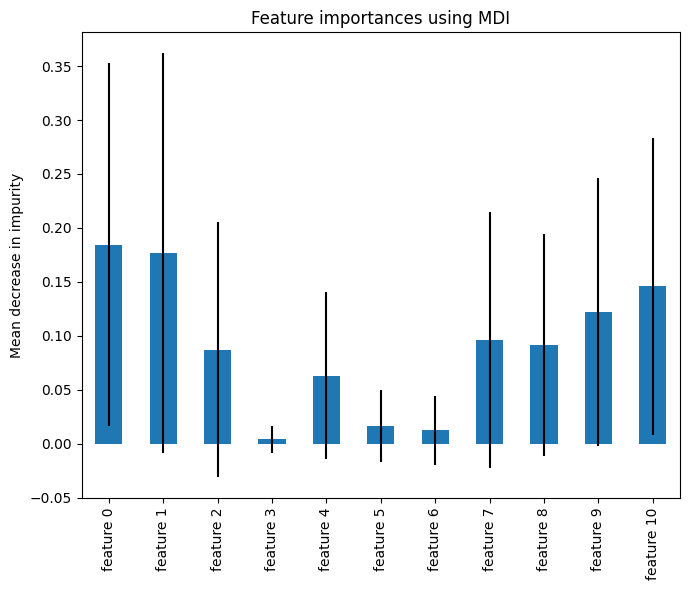

In [ ]:
import pandas as pd

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

Elapsed time to compute the importances: 1.165 seconds


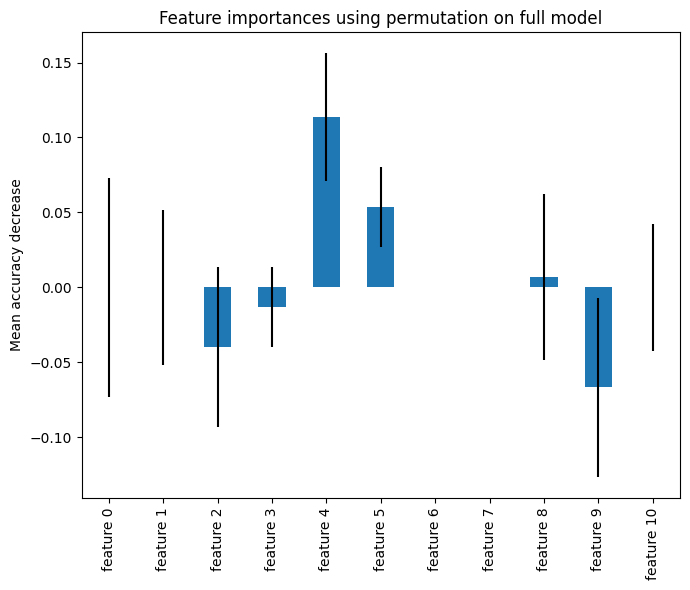

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
RANDOM_STATE = 0

In [ ]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

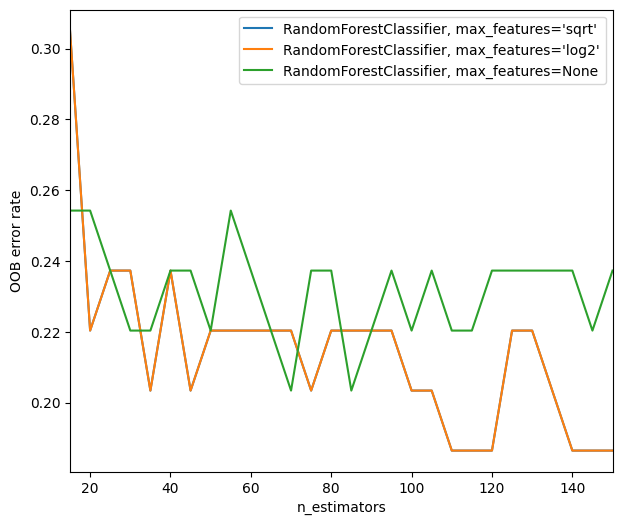

In [ ]:
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 150

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 5):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
>>> from sklearn.linear_model import LogisticRegression

In [ ]:
>>> clf = LogisticRegression(random_state=0).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
clf.coef_

array([[-5.96912790e-01,  1.06497902e+00,  4.05953807e-01,
        -6.69301700e-03, -5.93430887e-01, -3.26464306e-01,
         2.87452456e-01,  6.21209791e-01],
       [ 3.06479925e-01, -1.22487343e-02,  5.75466455e-01,
         5.98934252e-03,  9.34473968e-02, -6.94328175e-03,
         3.69542804e-01, -4.43747794e-01],
       [ 2.90432865e-01, -1.05273028e+00, -9.81420262e-01,
         7.03674481e-04,  4.99983490e-01,  3.33407588e-01,
        -6.56995259e-01, -1.77461998e-01]])

In [ ]:
train_preds = clf.predict(X_train)
test_preds= clf.predict(X_test)

In [ ]:
accuracy_score(y_train,train_preds)

0.7727272727272727

In [ ]:
accuracy_score(y_test,test_preds)

0.7333333333333333

In [ ]:
>>> f1_score(y_train,train_preds, average=None)

array([0.83333333, 0.82051282, 0.92307692])

In [ ]:
>>> f1_score(y_test,test_preds, average=None)

array([0.71428571, 0.5       , 0.75      ])

In [ ]:
>>> from sklearn import preprocessing
>>> X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
>>> scaler = preprocessing.StandardScaler().fit(X_train)
>>> X_train_transformed = scaler.transform(X_train)

>>> X_test_transformed = scaler.transform(X_test)
>>> clf.score(X_test_transformed, y_test)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.4166666666666667